# Imports

In [1]:
from queue import PriorityQueue as priority_queue
import random
import numpy as np
import pandas as pd
import functools
import time
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Timer Decorator

In [2]:
def timer(func):
    @functools.wraps(func)
    def wrapper_timer(*args, **kwargs):
        start = time.perf_counter()
        value = func(*args, **kwargs)
        end = time.perf_counter()
        elapsed = end - start
        print(f"Time taken to run the function: {elapsed} seconds")
        return value
    return wrapper_timer

## Array implementation of Priority Queue

In [3]:
# PQ should be implemented adding in tuples (vertex, weight)
class PriorityQueue(object):
    def __init__(self):
        self.queue = []
  
    def __str__(self):
        return ' '.join([str(i) for i in self.queue])
  
    # for checking if the queue is empty
    def isEmpty(self):
        return len(self.queue) == 0
  
    # for inserting an element in the queue
    def insert(self, data):
        self.queue.append(data)
        # self.queue.sort(key=lambda tup: tup[1])
  
    # for popping an element based on smallest dist
    def extractCheapest(self):
        try:
            minimum = 0
            min_tuple = self.queue[minimum]
            minimum_initial = min_tuple[1]
            for i in range(len(self.queue)):
                tuple = self.queue[i]
                to_compare = tuple[1]
                if to_compare < minimum_initial:
                    minimum_initial = to_compare
                    minimum = i
            item = self.queue[minimum]
            del self.queue[minimum]
            return item
        except IndexError:
            print()
            exit()
    
    def delete(self):
        try:
            maximum = 0
            max_tuple = self.queue[maximum]
            maximum_initial = max_tuple[1]
            for i in range(len(self.queue)):
                tuple = self.queue[i]
                to_compare = tuple[1]
                if to_compare > maximum_initial:
                    maximum_initial = to_compare
                    maximum = i
            item = self.queue[maximum]
            del self.queue[maximum]
            return item
        except IndexError:
            print()
            exit()
    
    def peek(self): 
        return self.queue[0]

    # def delete(self, neighbour):
    #     for i in range(len(self.queue)):
    #         temp_tuple = self.queue[i]
    #         if (temp_tuple[0] == neighbour):
    #             del self.queue[i]
    #     return temp_tuple 

# TESTING PRIORITY QUEUE
if __name__ == '__main__':
    myQueue = PriorityQueue()
    myQueue.insert((12, 1))
    myQueue.insert((7, 4))
    myQueue.insert((14, 3))
    myQueue.insert((1, 2)) 
    print(myQueue)            
    while not myQueue.isEmpty():
        # print(myQueue.extractCheapest())
        print(myQueue.delete()) 

(12, 1) (7, 4) (14, 3) (1, 2)
(7, 4)
(14, 3)
(1, 2)
(12, 1)


In [4]:
class handmade_prio_q():
    def __init__(self):
        self.array = []
    
    def add_object(self, item, priority):
        temp_tuple = (item, priority)
        self.array.append(temp_tuple)
        self.array.sort(key = lambda x: x[1])

    def del_object(self, item):
        index = 0
        for i in self.array:
            if (i[0] == item):
                self.array.pop(index)
                return
            index += 1
    
    def is_empty(self):
        return not bool(len(self.array))

## Graph

In [5]:
# class Graph_0: 

#     # Constructor 
#     def __init__(self, vertices):
#         self.V = vertices # number of vertices 
#         self.graph = [[float('inf') for column in range(vertices)] for row in range(vertices)] # creates the matrix 

#     # Method to add edges 
#     def add_edge(self, u, v, dist):
#         self.graph[u][v] = dist
#         # self.graph[v][u] = dist

#     # Shortest path algo 
#     def dijkstra_shortest_path(self, start): 
#         dist = [float('inf')] * self.V
#         pi = [-1] * self.V
#         Set = [False] * self.V 
        
#         dist[start] = 0
#         priority_queue = PriorityQueue()

#         # put everything into a pq 
#         for i in range(self.V):
#             priority_queue.insert((i ,self.graph[i][0]))
#         # print(priority_queue)
        

#         while not priority_queue.isEmpty():
#             # u = self.find_min(dist, Set)
#             # print(priority_queue)
#             current_tuple = priority_queue.extractCheapest()
#             # print(current_tuple)
#             u = current_tuple[0]
#             # print(u+1)
#             # print(Set)
#             # print(dist)
#             Set[u] = True 
            

#             for neighbour in range(self.V):
#                 # If it is a neighbour
#                 # and not yet visited 
#                 if (self.graph[u][neighbour] > 0 and Set[neighbour] == False and dist[neighbour] > dist[u] + self.graph[u][neighbour]):
#                     # ERROR WITH DELETING NEIGHBOURS 
#                     priority_queue.delete()
#                     # print(u, neighbour, dist[neighbour])

#                     dist[neighbour] = dist[u] + self.graph[u][neighbour]
#                     pi[neighbour] = u + 1
#                     priority_queue.insert((neighbour, dist[neighbour]))
                

 
#         self.printSolution(dist)
#             # print(pi)

#     def printSolution(self, dist):
#         print ("Vertex \tDistance from Source")
#         for node in range(self.V):
#             print (node, "\t", dist[node])

In [6]:
# Graph Class with jovian's prio queue

class Graph: 

    # Constructor 
    def __init__(self, vertices):
        self.V = vertices # number of vertices 
        self.graph = [[float('inf') for column in range(vertices + 1)] for row in range(vertices + 1)] # creates the matrix  # 0,0 is offset node 0 is offset
        self.pi = []
        self.edge = 0

    # Method to add edges 
    def add_edge(self, u, v, dist):
        self.graph[u][v] = dist
        self.edge += 1
        # self.graph[v][u] = dist

    # Shortest path algo
    # @timer
    def dijkstra_shortest_path(self, start = 1, print = True):
        start_time = time.perf_counter()
        dist = [float('inf')] * (self.V + 1)
        pi = [None] * (self.V + 1)
        Set = [False] * (self.V + 1) 
        
        dist[start] = 0
        # priority_queue = PriorityQueue()
        pq = handmade_prio_q()

        # put everything into a pq 
        for i in range(1, self.V + 1):
            # priority_queue.insert((i ,self.graph[i][0]))
            pq.add_object(i, self.graph[i][0])
        # print(priority_queue)
        

        # while not priority_queue.isEmpty():
        while not pq.is_empty():
            # u = self.find_min(dist, Set)
            # print(priority_queue)

            # current_tuple = priority_queue.extractCheapest()

            current_tuple = pq.array[0]
            pq.del_object(pq.array[0][0])        
            # print(current_tuple)
            u = current_tuple[0]
            # print(u+1)
            # print(Set)
            # print(dist)
            Set[u] = True 
            

            for neighbour in range(1, self.V + 1):
                # If it is a neighbour
                # and not yet visited 
                if (self.graph[u][neighbour] > 0 and Set[neighbour] == False and dist[neighbour] > dist[u] + self.graph[u][neighbour]):
                    # ERROR WITH DELETING NEIGHBOURS 
                    # priority_queue.delete()
                    pq.del_object(neighbour)
                    # print(u, neighbour, dist[neighbour])

                    dist[neighbour] = dist[u] + self.graph[u][neighbour]
                    pi[neighbour] = u
                    # priority_queue.insert((neighbour, dist[neighbour]))
                    pq.add_object(neighbour, dist[neighbour])
                

        end = time.perf_counter()
        time_taken = end - start_time
        self.pi = pi
        if print:
            self.printSolution(dist)

        return dist, time_taken

    def printSolution(self, dist):
        print("----------------------------------------------------------")
        print(f"Matrix implementation of graph, with {self.V} vertices and {self.edge} edges")
        print ("|Vertex\t\t\t\t|Distance from Source\t\t\t\t|Previous node")
        for node in range(1, self.V+1):
            print(f"|{node}\t\t\t\t|{dist[node]}\t\t\t\t|{self.pi[node]}")
        print("----------------------------------------------------------")



jovian's ver of matrix graph

In [7]:
# class Graph_2:
#     def __init__(self, vertices, edges = 0):
#         self.vertices = vertices
#         self.edges = edges
#         self.matrix = [[float('inf') for column in range(vertices + 1)] for row in range(vertices + 1)]

#     def add_edge(self, first, second, weight):
#         self.matrix[first][second] = weight
#         self.edges += 1
    
#     def dijkstra(self, start = 1):
#         known_distance = [float('inf')] * (self.vertices + 1)
#         previous_node = [None] * (self.vertices + 1)
#         visited = [0] * (self.vertices + 1)

#         known_distance[start] = 0
#         priority_queue = handmade_prio_q()

#         for i in range(1, self.vertices + 1):
#             priority_queue.add_object(i, known_distance[i]) # sort by their distance from source
        
#         while not priority_queue.is_empty():
#             current_tuple = priority_queue.array[0]
#             priority_queue.del_object(current_tuple[0])
#             current_vertex = current_tuple[0]

#             visited[current_vertex] = 1

#             for possible_adjacent in range(1, self.vertices + 1):
#                 if (possible_adjacent != current_vertex): # check if current vertex
#                     if ((self.matrix[current_vertex][possible_adjacent]) != float('inf')): # check if i adjacent to current vertex
#                         bool_one = visited[possible_adjacent] != 1
#                         bool_two = known_distance[possible_adjacent] > known_distance[current_vertex] + self.matrix[current_vertex][possible_adjacent]

#                         if (bool_one and bool_two):
#                             priority_queue.del_object(possible_adjacent)
#                             known_distance[possible_adjacent] = known_distance[current_vertex] + self.matrix[current_vertex][possible_adjacent]
#                             previous_node[possible_adjacent] = current_vertex
#                             priority_queue.add_object(possible_adjacent, known_distance[possible_adjacent])

#         self.print_solution(known_distance, previous_node)

#     def print_solution(self, known_distance, previous_node):
#         print(f"-----------------------------------------------")
#         print(f"Matrix solution of dijsktra with {self.vertices} vertices and {self.edges} edges")
#         print(f"|Vertex\t|Distance to source\t|Previous node")
#         for i in range(1, self.vertices + 1):
#             print(f"|{i}\t|{known_distance[i]}\t\t\t|{previous_node[i]}")



In [8]:
# Taken from Tutorial 2 Q1 
# g.dijkstra_shortest_path(1)

g = Graph(5)
g.add_edge(1, 2, 4)
g.add_edge(1, 3, 2)
g.add_edge(1, 4, 6)
g.add_edge(1, 5, 8)
g.add_edge(2, 4, 4)
g.add_edge(2, 5, 3)
g.add_edge(3, 4, 1)
g.add_edge(4, 2, 1)
g.add_edge(4, 5, 3)

g.dijkstra_shortest_path()

----------------------------------------------------------
Matrix implementation of graph, with 5 vertices and 9 edges
|Vertex				|Distance from Source				|Previous node
|1				|0				|None
|2				|4				|1
|3				|2				|1
|4				|3				|3
|5				|6				|4
----------------------------------------------------------


([inf, 0, 4, 2, 3, 6], 3.189999999975157e-05)

References: 
---
https://www.geeksforgeeks.org/priority-queue-in-python/ 

https://www.geeksforgeeks.org/python-program-for-dijkstras-shortest-path-algorithm-greedy-algo-7/


## Linked List Implementation

In [9]:
class node:
    def __init__(self, data_value = None, index = None):
        self.data_value = data_value # value
        self.index = index # for indexing in linked list
        self.weight = 0 # for weighted graphs
        self.next_node = None # to point to next node

class linked_list:
    def __init__(self):
        self.size = 0
        self.head = None
    
    def append(self, number):
        temp = node(number, self.size) # insert at the end, so insert at size
        if (self.head == None): # first node
            self.head = temp 
        else:
            self.node_at(self.size - 1).next_node = temp # insert at the end
        self.size += 1

    def print_list(self):
        temp = self.head
        while (temp != None): # traverse down the list
            print(f"{temp.data_value}", end = "")
            if (temp.weight != 0): # for graph printing
                print(f"/W:{temp.weight}", end = "")
            print(" -> ", end = "")
            temp = temp.next_node
        print("")

    def contains(self, value): # checks if a value exists in a list
        temp = self.head;
        while temp:
            if temp.data_value == value:
                return True
            else:
                temp = temp.next_node

        return False

    def find_index(self, value): # get index of a value in a list
        if (self.contains(value)):
            temp = self.head
            while temp:
                if (temp.data_value == value):
                    return temp.index
                else:
                    temp = temp.next_node

    def node_at(self, index): # get node at index in a list
        if (index >= self.size):
            print("No such node")
            return None

        temp = self.head;
        while (temp.index != index):
            temp = temp.next_node

        return temp


    def remove_at(self, index): # remove node at certain index
        if (index >= self.size): # too lazy to deal with removing head node
            print("No such node")
            return
        elif (index == 0):
            self.dequeue()
            return
        
        temp = self.node_at(index-1)
        temp.next_node = self.node_at(index).next_node
        self.size -= 1
    
    def pop(self):
        self.remove_at(self.size - 1)
    
    def dequeue(self):
        self.head = self.head.next_node

## Linked List implementation of Graph

In [10]:
# class list_graph_0:
#     def __init__(self, vertices = 0):
#         self.vertices = vertices
#         self.edges = 0
#         temp = [None]
#         for i in range(1, vertices+1):
#             temp_list = linked_list()
#             temp_list.append(i)
#             temp.append(temp_list)
#         self.list = temp
    
#     def add_edge(self, vertex_one, vertex_two, weight = 1):
#         flag = False
#         if (not self.list[vertex_one].contains(vertex_two)): # is there already an edge from one to two
#             flag = True
#             self.list[vertex_one].append(vertex_two) # add two to linked list
#             self.list[vertex_one].node_at(self.list[vertex_one].size - 1).weight = weight # get node of two in one's linked list. set weight to weight. (one/weight = 0) -> (two/weight = weight)

#         # if (not self.list[vertex_two].contains(vertex_one)):
#         #     flag = True
#         #     self.list[vertex_two].append(vertex_one)
#         #     self.list[vertex_two].node_at(self.list[vertex_two].size - 1).weight = weight

#         if (flag):
#             self.edges += 1
#         else: # update weights
#             index = self.list[vertex_one].find_index(vertex_two)
#             self.list[vertex_one].node_at(index).weight = weight
#             # index = self.list[vertex_two].find_index(vertex_one)
#             # self.list[vertex_two].node_at(index).weight = weight

#     def print_graph(self):
#         for i in range(1, self.vertices + 1):
#             self.list[i].print_list()

#     def dijkstra(self): # assuming source is vertex 1
#         visited = [False] * (self.vertices + 1)
#         visited[0] = True

#         # output
#         # create a dictionary, key is vertex, value[0] is shortest distance from vertex 1
#         # value[1] is previous vertex
#         shortest_path_dict = {}
#         for i in range(1, self.vertices + 1):
#             shortest_path_dict[i] = [float('inf'), None]

#         # travelling from 1 to 1 is 0, no prev vertex
#         shortest_path_dict[1] = [0, None]

#         # create priority queue
#         queueueue = priority_queue()
#         for i in range(1, self.vertices + 1):
#             # put every vertex into prio queue, prio number being weight
#             queueueue.put((shortest_path_dict[i][0], i))

#         # start looping
#         while (not queueueue.empty()):
#             current_tuple = queueueue.get()
#             current_vertex = current_tuple[1]
#             visited[current_vertex] = True

#             # print(current_vertex)

#             # loop through current vertex's adj list
#             temp_node = self.list[current_vertex].head.next_node
#             while (temp_node != None):
#                 # check if temp_node has been visited
#                 first_bool = visited[temp_node.data_value]

#                 # check if known distance to temp_node is greater than known distance to current vertex + 
#                 # weight of current vertex to temp_node
#                 second_bool = (shortest_path_dict[temp_node.data_value][0] > shortest_path_dict[current_vertex][0] + temp_node.weight)

#                 if (not first_bool and second_bool):
#                     # remove temp_node from queueueue
#                     # create temp queue
#                     temp_queueueue = priority_queue()

#                     # move items from queue into temp queue
#                     while (not queueueue.empty()):
#                         temp_tuple = queueueue.get()

#                         # if item is not temp_node
#                         if (temp_tuple[0] != temp_node.data_value):
#                             temp_queueueue.put(temp_tuple)

#                     # update path dict
#                     shortest_path_dict[temp_node.data_value][0] = shortest_path_dict[current_vertex][0] + temp_node.weight
#                     shortest_path_dict[temp_node.data_value][1] = current_vertex

#                     # add temp_node with new info into temp queue
#                     temp_queueueue.put((shortest_path_dict[temp_node.data_value][0], temp_node.data_value))

#                     # set queue back to temp queue
#                     queueueue = temp_queueueue

#                 temp_node = temp_node.next_node
#         return shortest_path_dict

In [11]:
class list_graph:
    def __init__(self, vertices = 0):
        self.vertices = vertices
        self.edges = 0
        temp = [None]
        for i in range(1, vertices+1):
            temp_list = linked_list()
            temp_list.append(i)
            temp.append(temp_list)
        self.list = temp
    
    def add_edge(self, vertex_one, vertex_two, weight = 1):
        flag = False
        if (not self.list[vertex_one].contains(vertex_two)): # is there already an edge from one to two
            flag = True
            self.list[vertex_one].append(vertex_two) # add two to linked list
            self.list[vertex_one].node_at(self.list[vertex_one].size - 1).weight = weight # get node of two in one's linked list. set weight to weight. (one/weight = 0) -> (two/weight = weight)

        # if (not self.list[vertex_two].contains(vertex_one)):
        #     flag = True
        #     self.list[vertex_two].append(vertex_one)
        #     self.list[vertex_two].node_at(self.list[vertex_two].size - 1).weight = weight

        if (flag):
            self.edges += 1
        else: # update weights
            index = self.list[vertex_one].find_index(vertex_two)
            self.list[vertex_one].node_at(index).weight = weight
            # index = self.list[vertex_two].find_index(vertex_one)
            # self.list[vertex_two].node_at(index).weight = weight

    def print_graph(self):
        for i in range(1, self.vertices + 1):
            self.list[i].print_list()

    
    # @timer
    def dijkstra(self, source = 1, print = True):
        start = time.perf_counter()
        known_distance = [float('inf')] * (self.vertices + 1)
        previous_node = [None] * (self.vertices + 1)
        visited = [0] * (self.vertices + 1)

        known_distance[source] = 0
        prio_queueueue = priority_queue()
        for i in range(1, self.vertices + 1):
            prio_queueueue.put((known_distance[i], i))

        while not prio_queueueue.empty():
            current_tuple = prio_queueueue.get()
            current_vertex = current_tuple[1]
            visited[current_vertex] = 1

            current_node = self.list[current_vertex].head.next_node
            while (current_node != None):
                adjacent = current_node.data_value
                bool_one = visited[adjacent] != 1
                bool_two = known_distance[adjacent] > known_distance[current_vertex] + current_node.weight

                if (bool_one and bool_two):
                    prio_queueueue = self.remove_queue(prio_queueueue, adjacent)
                    known_distance[adjacent] = known_distance[current_vertex] + current_node.weight
                    previous_node[adjacent] = current_vertex
                    prio_queueueue.put((known_distance[adjacent], adjacent))
                current_node = current_node.next_node
        end = time.perf_counter()
        time_taken = end - start
                
        if print:
            self.print_solution(known_distance, previous_node)

        return known_distance, time_taken

    def remove_queue(self, queue, object):
        to_return = priority_queue()
        while not queue.empty():
            temp = queue.get()

            if temp[1] != object:
                to_return.put(temp)
        
        return to_return

    def print_solution(self, distance, previous):
        print("----------------------------------------------------------")
        print(f"Linked List implementation of graph, with {self.vertices} vertices and {self.edges} edges")
        print("|Vertex\t\t\t\t|Distance from source\t\t\t\t|Previously accessed node")
        for i in range(1, self.vertices + 1):
            print(f"|{i}\t\t\t\t|{distance[i]}\t\t\t\t|{previous[i]}")

        print("----------------------------------------------------------")
        return

# Testing of Both Algorithms

In [12]:
test_graph = list_graph(5)
test_graph.add_edge(1, 2, 4)
test_graph.add_edge(1, 3, 2)
test_graph.add_edge(1, 4, 6)
test_graph.add_edge(1, 5, 8)
test_graph.add_edge(2, 4, 4)
test_graph.add_edge(2, 5, 3)
test_graph.add_edge(3, 4, 1)
test_graph.add_edge(4, 2, 1)
test_graph.add_edge(4, 5, 3)

g = Graph(5)
g.add_edge(1, 2, 4)
g.add_edge(1, 3, 2)
g.add_edge(1, 4, 6)
g.add_edge(1, 5, 8)
g.add_edge(2, 4, 4)
g.add_edge(2, 5, 3)
g.add_edge(3, 4, 1)
g.add_edge(4, 2, 1)
g.add_edge(4, 5, 3)


In [13]:
list_dist, list_time = test_graph.dijkstra()
matr_dist, matr_time = g.dijkstra_shortest_path()

if (list_dist == matr_dist):
    print(f"Linked List took {list_time:6f} seconds")
    print(f"Matrix took {matr_time:6f} seconds")

----------------------------------------------------------
Linked List implementation of graph, with 5 vertices and 9 edges
|Vertex				|Distance from source				|Previously accessed node
|1				|0				|None
|2				|4				|1
|3				|2				|1
|4				|3				|3
|5				|6				|4
----------------------------------------------------------
----------------------------------------------------------
Matrix implementation of graph, with 5 vertices and 9 edges
|Vertex				|Distance from Source				|Previous node
|1				|0				|None
|2				|4				|1
|3				|2				|1
|4				|3				|3
|5				|6				|4
----------------------------------------------------------
Linked List took 0.000285 seconds
Matrix took 0.000032 seconds


# Analysis

## Generate random test cases 

In [14]:
def iterate_test_case(lower, upper, step):
    i = 0
    test_dictionary = {}
    for vertices in range(lower, upper, step):
        matr_test = Graph(vertices)
        link_test = list_graph(vertices)

        for j in range(1, vertices + 1):
            for k in range(1, vertices + 1):
                if (j != k):
                    weight_0 = random.randint(0, vertices)
                    weight_1 = random.randint(0, vertices)
                    weight_2 = random.randint(0, int(vertices/4))
                    weight_3 = random.randint(0, int(vertices/3))
                    weight_4 = random.randint(0, int(vertices/2))
                    weight = weight_0 * weight_1 * weight_2 * weight_3 * weight_4
                    weight = (int)(weight ** (1./5))
                    if (weight != 0):
                        matr_test.add_edge(j, k , weight)
                        link_test.add_edge(j, k , weight)
                        
        test_dictionary[i] = [matr_test, link_test]
        i += 1
    return test_dictionary


In [15]:
def random_test_case(lower, upper):
    i = 0
    test_dictionary = {}
    step = random.randint(1, (int)(upper/(random.randint(lower, upper/2))))
    for vertices in range(lower, upper, step):
        matr_test = Graph(vertices)
        link_test = list_graph(vertices)
        for j in range(random.randint(lower, upper)):
            l = random.randint(1, vertices)
            k = random.randint(1, vertices)
        
            if (j != k):
                weight = random.randint(0, random.randint(0, vertices))
                if (weight != 0):
                    matr_test.add_edge(k, l, weight)
                    link_test.add_edge(k, l, weight)
        test_dictionary[i] = [matr_test, link_test]
        i += 1
    return test_dictionary

In [16]:
def run_test(test_dictionary, printing = True):
    result_dictionary = {}
    for key, value in test_dictionary.items():
        matr_test = value[0]
        link_test = value[1]

        matr_dist, matr_time = matr_test.dijkstra_shortest_path(print = False)
        link_dist, link_time = link_test.dijkstra(print = False)
        time_diff = abs(matr_time - link_time)

        results = {}
        results["vertices"] = link_test.vertices
        results["edges"] = link_test.edges
        results["matr_time"] = matr_time
        results["link_time"] = link_time
        results["time_diff"] = time_diff
        results["link faster"] = False
        results["matrix faster"] = False
        if printing:
            print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
            print(f"Test number {key}")

        if (matr_dist == link_dist):
            if (matr_time < link_time):
                results["matrix faster"] = True
                if printing:
                    print(f"Matrix is faster by {time_diff:6f} seconds")
            else:
                results["link faster"] = True
                if printing:
                    print(f"Linked List is faster by {time_diff:6f} seconds")

        result_dictionary[key] = results

    return pd.DataFrame.from_dict(result_dictionary, orient = "index")

In [17]:
test_set_0 = iterate_test_case(10, 250, 10)
results_0 = run_test(test_set_0, False)
results_0

,vertices,edges,matr_time,link_time,time_diff,link faster,matrix faster
0,10,32,0.000145,0.000505,0.000360,False,True
1,20,215,0.000207,0.001822,0.001615,False,True
2,30,598,0.000421,0.004615,0.004194,False,True
3,40,1169,0.000769,0.009102,0.008333,False,True
4,50,1958,0.001136,0.014253,0.013117,False,True
5,60,2944,0.001758,0.022740,0.020982,False,True
6,70,4121,0.002403,0.034334,0.031931,False,True
7,80,5530,0.003031,0.044215,0.041184,False,True
8,90,7109,0.003959,0.056562,0.052603,False,True
9,100,8849,0.005182,0.083053,0.077871,False,True


In [18]:
test_set_1 = random_test_case(1,300)
results_1 = run_test(test_set_1, False)
results_1

,vertices,edges,matr_time,link_time,time_diff,link faster,matrix faster
0,1,0,0.000013,0.000043,0.000030,False,True
1,13,68,0.000109,0.000883,0.000774,False,True
2,25,53,0.000264,0.001678,0.001414,False,True
3,37,220,0.000660,0.007138,0.006478,False,True
4,49,165,0.000995,0.009168,0.008173,False,True
5,61,214,0.001571,0.017702,0.016131,False,True
6,73,174,0.002086,0.015368,0.013282,False,True
7,85,160,0.002419,0.016610,0.014191,False,True
8,97,112,0.002563,0.003102,0.000539,False,True
9,109,61,0.003080,0.000476,0.002604,True,False


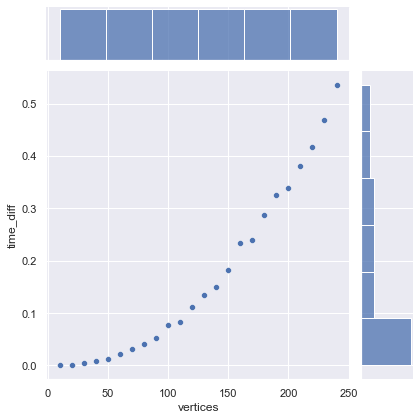

In [19]:
sb.jointplot(data = results_0, x = "vertices", y = "time_diff")

<AxesSubplot:xlabel='vertices', ylabel='link_time'>

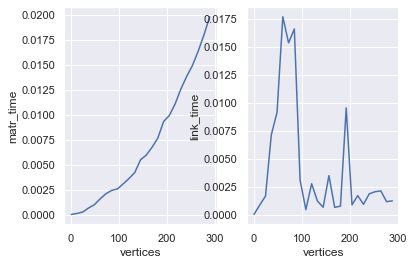

In [20]:
fig, ax = plt.subplots(1,2)
sb.lineplot(data = results_1, x = "vertices", y = "matr_time", ax = ax[0])
sb.lineplot(data = results_1, x = "vertices", y = "link_time", ax = ax[1])